In [1]:
#Import all of the libraries that is needed here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import torch

## Loading the Iris Data sets 

In [2]:
# Loading the Iris dataset from sklearn
iris = datasets.load_iris()

# Create Dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

#Create and set the target as the species column
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Display the species column
print(df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


## Visualisation of Data

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


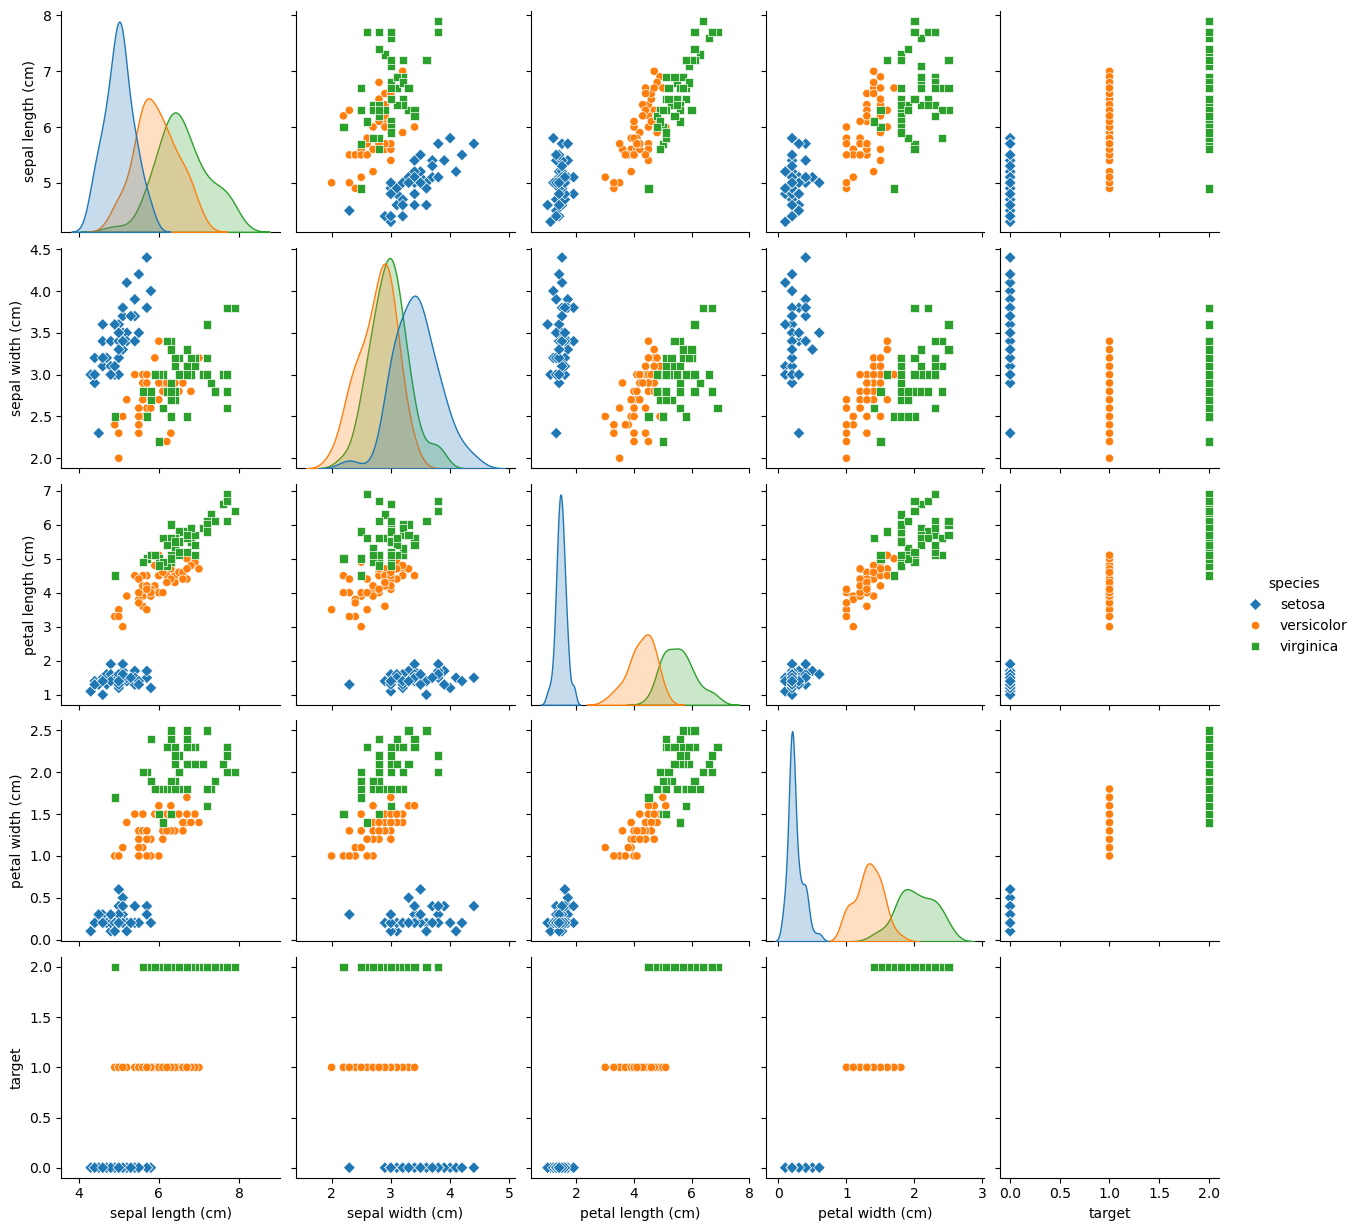

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [3]:
#Check for missing values in the dataset
print(df.isnull().sum())

#Create a pairplot based on the species of the dataset where o is circle, s is square and D is diamond
sns.pairplot(df, hue='species', markers=["D", "o", "s"])
plt.show()

#Summary of the plot
print(df.describe())

## Preprocessing of Data

In [4]:
#Extracting all of the column except the last 2 columns
X = df.iloc[:, :-2].values

#Extracting the species coloumn
y = df['species'].values

#This is a sklearn function which removes the mean and scale the data using varience for standardization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Spliting the dataset to 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training data: {X_train.shape[0]}")
print(f"Testing data: {X_test.shape[0]}")


Training data: 120
Testing data: 30


In [6]:
#Sepal features (Sepal Length and Sepal Width)
X_sepal = X_scaled[:, :2]

#Petal features (Petal Length and Petal Width)
X_petal = X_scaled[:, 2:]

## Creating a classifier with k = 8

In [7]:
#Initialize KNN with k=8 randomly
k = 8
knn = KNeighborsClassifier(n_neighbors=k)

#Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

# Training Data

## Training with only two seperate features

First we would only train it either with sepal length, sepal width, and the petal length petal width to see how well it predicts then we would use all 4 features as predictors for our KNN at the end.

### Using both sepal length and sepal width only

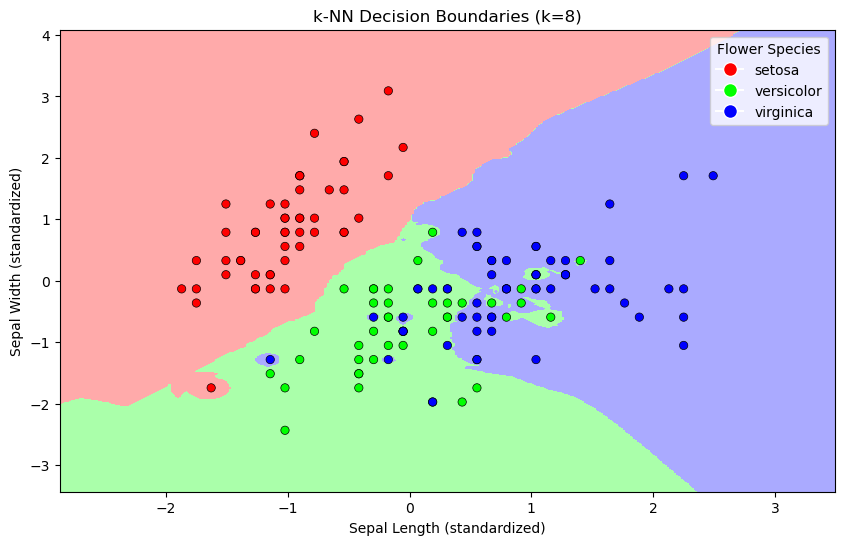

In [8]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    
    #create a legend for the flower species
    unique_labels = label_encoder.inverse_transform(np.unique(y))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=cmap_bold.colors[i], markersize=10)
               for i, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title='Flower Species')

    #Title and labels for x and y axis
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title(title)
    plt.show()

    
    

#Split the dataset into 80% training data and 20% testing data using only the sepal width and length
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(
    X_sepal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train_sepal, y_train_sepal)

#Plot the graph of the KNN
plot_decision_boundaries(X_sepal, y_encoded, knn, f'k-NN Decision Boundaries (k={k})')


In [9]:
#make predictions
y_pred = knn.predict(X_test_sepal)

#create a confusion matrix
conf_matrix = confusion_matrix(y_test_sepal, y_pred)

#create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                               index=label_encoder.classes_, 
                               columns=label_encoder.classes_)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

#calculate accuracy
accuracy = accuracy_score(y_test_sepal, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           5          5
virginica        0           5          5
Accuracy: 66.67%


### Using both petal length and petal width only

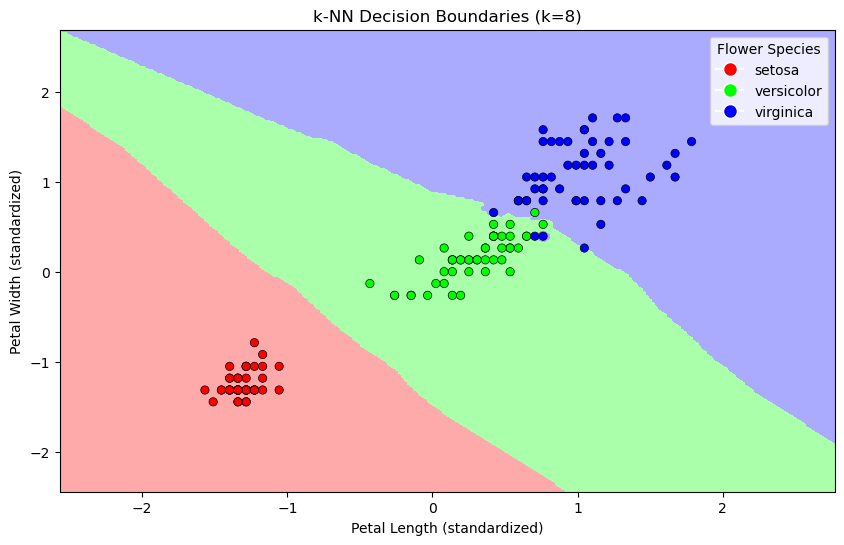

In [10]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    
    #create a legend for the flower species
    unique_labels = label_encoder.inverse_transform(np.unique(y))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=cmap_bold.colors[i], markersize=10)
               for i, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title='Flower Species')

    #Title and labels for x and y axis
    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the petal width and length
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(
    X_petal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train_petal, y_train_petal)

#Plot the graph of the KNN
plot_decision_boundaries(X_petal, y_encoded, knn, f'k-NN Decision Boundaries (k={k})')

In [11]:
#make predictions
y_pred = knn.predict(X_test_petal)

#create a confusion matrix
conf_matrix = confusion_matrix(y_test_petal, y_pred)

#create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                               index=label_encoder.classes_, 
                               columns=label_encoder.classes_)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# alculate accuracy
accuracy = accuracy_score(y_test_petal, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           2          8
Accuracy: 90.00%


## Optimise the K to find the best K for these two models

Optimising the model which uses **Sepal length and Sepal width**

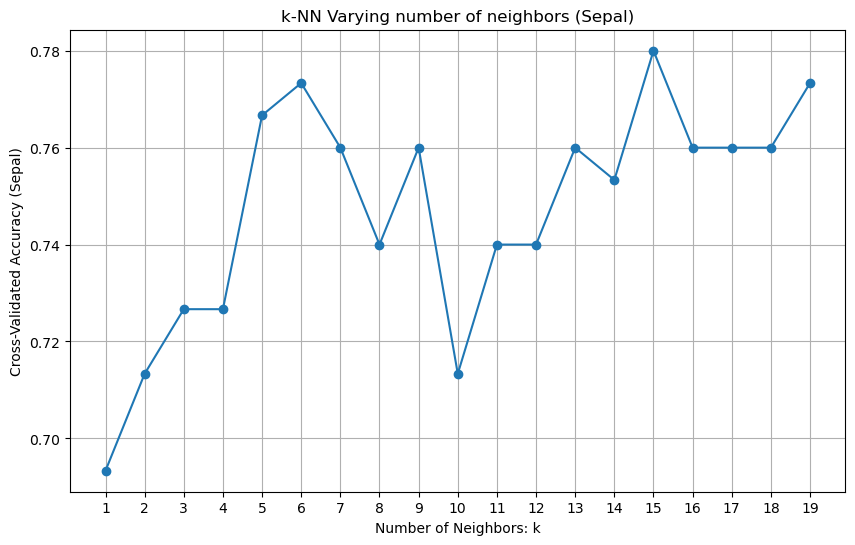

The optimal number of K for Sepal length and width is 15 with a cross-validated accuracy of 78.00%.


In [12]:
#Setting the k values from 1 to 20
k_values = range(1, 20)
cv_scores_sepal = []

#Looping through all of the K-values to see the accuracy of each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sepal, y_encoded, cv=10, scoring='accuracy')
    cv_scores_sepal.append(scores.mean())

#Plotting the results for Sepal length and width
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_sepal, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Cross-Validated Accuracy (Sepal)')
plt.title('k-NN Varying number of neighbors (Sepal)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Best k for Sepal length and width
best_k_sepal = k_values[np.argmax(cv_scores_sepal)]
print(f"The optimal number of K for Sepal length and width is {best_k_sepal} with a cross-validated accuracy of {max(cv_scores_sepal)*100:.2f}%.")

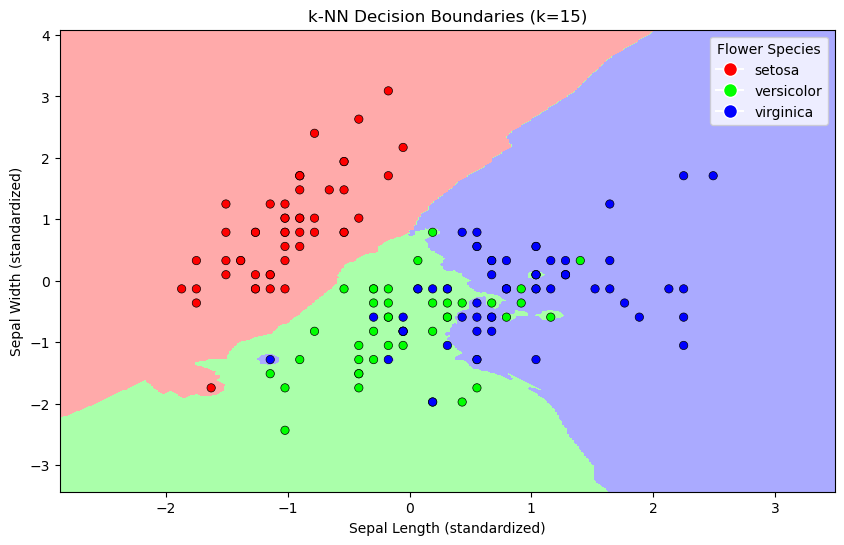

In [13]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    
    #create a legend for the flower species
    unique_labels = label_encoder.inverse_transform(np.unique(y))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=cmap_bold.colors[i], markersize=10)
               for i, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title='Flower Species')

    #Title and labels for x and y axis
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the sepal width and length
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(
    X_sepal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
optimal_k_sepal= k_values[np.argmax(cv_scores_sepal)]
knn = KNeighborsClassifier(n_neighbors=optimal_k_sepal, weights='distance')
knn.fit(X_train_sepal, y_train_sepal)

#Plot the graph of the KNN
plot_decision_boundaries(X_sepal, y_encoded, knn, f'k-NN Decision Boundaries (k={optimal_k_sepal})')

In [14]:
#make predictions
y_pred = knn.predict(X_test_sepal)

#create a confusion matrix
conf_matrix = confusion_matrix(y_test_sepal, y_pred)

#create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                               index=label_encoder.classes_, 
                               columns=label_encoder.classes_)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# alculate accuracy
accuracy = accuracy_score(y_test_sepal, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           5          5
virginica        0           5          5
Accuracy: 66.67%


Optimising the model which uses the **Petal length and Petal width**

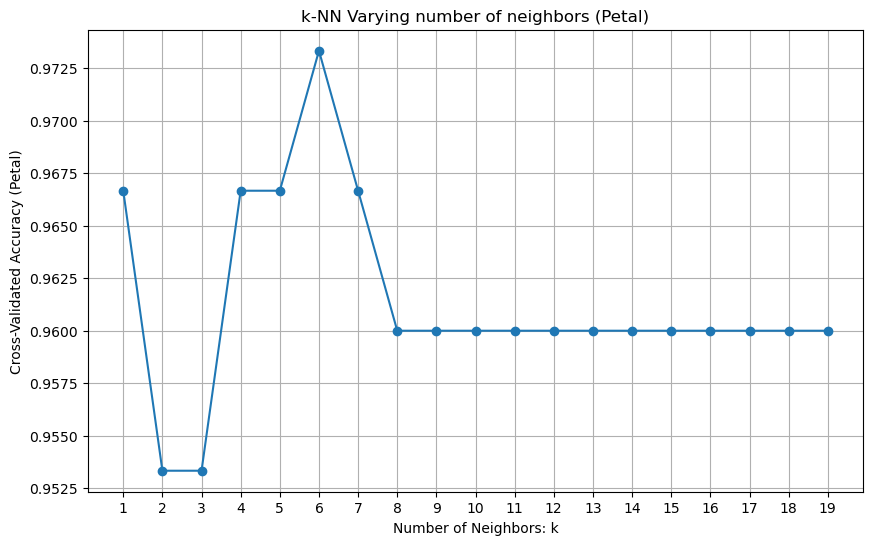

The optimal number of K for Petal length and width is 6 with a cross-validated accuracy of 97.33%.


In [15]:
#Setting the k values from 1 to 20
k_values = range(1, 20)
cv_scores_petal = []

#Looping through all of the K-values to see the accuracy of each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_petal, y_encoded, cv=10, scoring='accuracy')
    cv_scores_petal.append(scores.mean())

#Plotting the results for Petal length and width
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_petal, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Cross-Validated Accuracy (Petal)')
plt.title('k-NN Varying number of neighbors (Petal)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Best k for Petal length and width
best_k_petal = k_values[np.argmax(cv_scores_petal)]
print(f"The optimal number of K for Petal length and width is {best_k_petal} with a cross-validated accuracy of {max(cv_scores_petal)*100:.2f}%.")

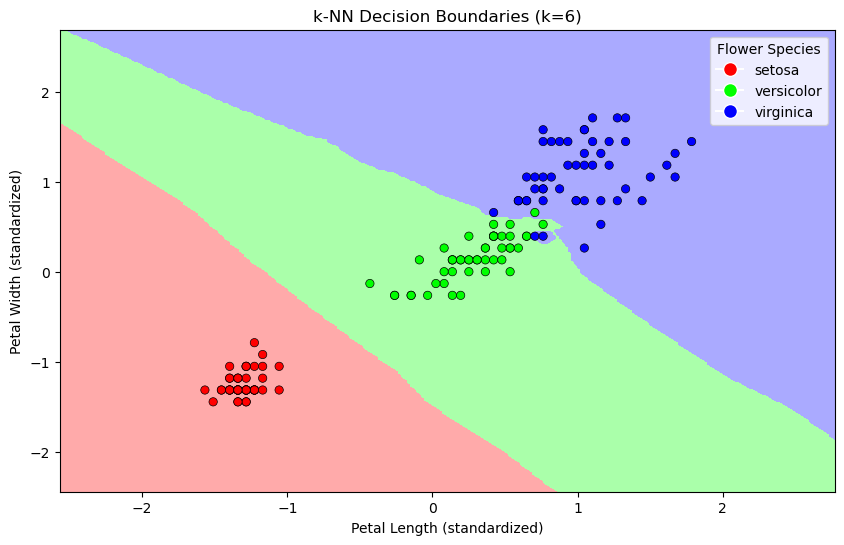

In [16]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    
    #create a legend for the flower species
    unique_labels = label_encoder.inverse_transform(np.unique(y))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=cmap_bold.colors[i], markersize=10)
               for i, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title='Flower Species')

    #Title and labels for x and y axis
    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the petal width and length
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(
    X_petal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
optimal_k_petal= k_values[np.argmax(cv_scores_petal)]
knn = KNeighborsClassifier(n_neighbors=optimal_k_petal, weights='distance')
knn.fit(X_train_petal, y_train_petal)

#Plot the graph of the KNN
plot_decision_boundaries(X_petal, y_encoded, knn, f'k-NN Decision Boundaries (k={optimal_k_petal})')

In [17]:
#make predictions
y_pred = knn.predict(X_test_petal)

#create a confusion matrix
conf_matrix = confusion_matrix(y_test_petal, y_pred)

#create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                               index=label_encoder.classes_, 
                               columns=label_encoder.classes_)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# alculate accuracy
accuracy = accuracy_score(y_test_petal, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           1          9
Accuracy: 93.33%


## Using all of the features to predict

Giving it a random K for the model

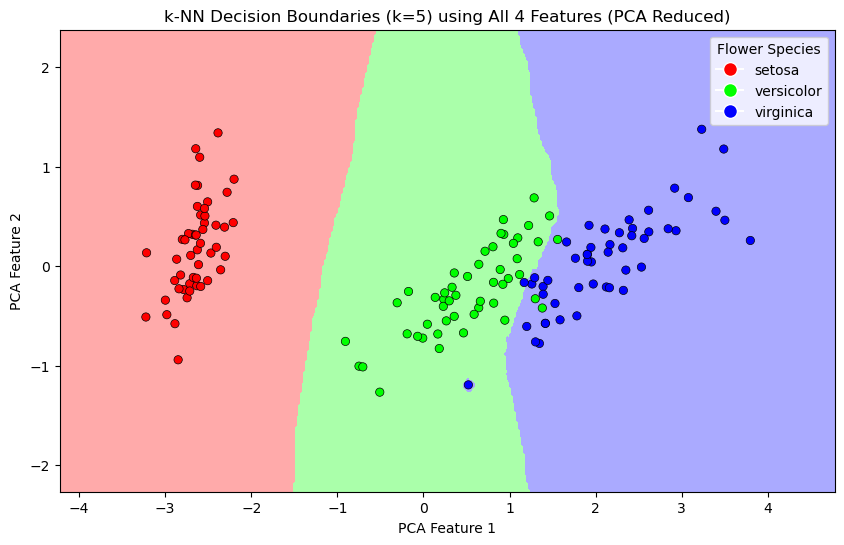

In [18]:
# Extract species into numerical values
k_all = 5
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    
    #create a legend for the flower species
    unique_labels = label_encoder.inverse_transform(np.unique(y))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=cmap_bold.colors[i], markersize=10)
               for i, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title='Flower Species')

    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(title)
    plt.show()

# Perform PCA to reduce features to 2 dimensions
pca_all = PCA(n_components=2)
X_pca_all = pca_all.fit_transform(X)

# Split the dataset into 80% training and 20% testing data using all features (PCA-reduced)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_pca_all, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

knn_pca = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_pca.fit(X_train_all, y_train_all)

# Plot the decision boundaries using PCA-reduced data
plot_decision_boundaries(X_pca_all, y_encoded, knn_pca, f'k-NN Decision Boundaries (k={k_all}) using All 4 Features (PCA Reduced)')

In [19]:
#make predictions
y_pred = knn_pca.predict(X_test_all)

#create a confusion matrix
conf_matrix = confusion_matrix(y_test_all, y_pred)

#create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                               index=label_encoder.classes_, 
                               columns=label_encoder.classes_)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# alculate accuracy
accuracy = accuracy_score(y_test_all, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           1          9
Accuracy: 93.33%


**Using CV to find best K**

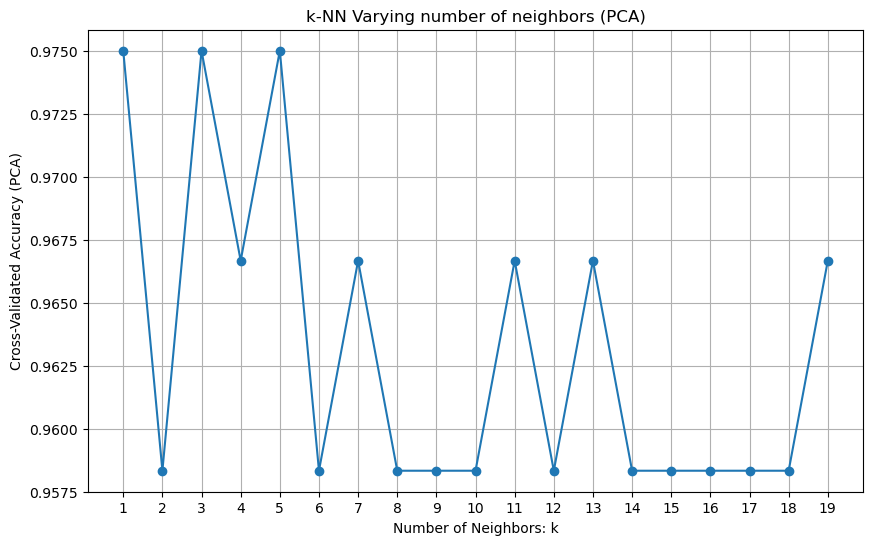

The optimal number of K for Petal length and width is 1 with a cross-validated accuracy of 97.50%.


In [20]:
#Setting the k values from 1 to 20
k_values = range(1, 20)
cv_scores_all = []

#Looping through all of the K-values to see the accuracy of each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use y_train instead of y_encoded
    scores = cross_val_score(knn, X_train_all, y_train_all, cv=10, scoring='accuracy')
    cv_scores_all.append(scores.mean())

#Plotting the results for Petal length and width
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_all, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Cross-Validated Accuracy (PCA)')
plt.title('k-NN Varying number of neighbors (PCA)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Best k for Petal length and width
best_k_all = k_values[np.argmax(cv_scores_all)]
print(f"The optimal number of K for Petal length and width is {best_k_all} with a cross-validated accuracy of {max(cv_scores_all)*100:.2f}%.")

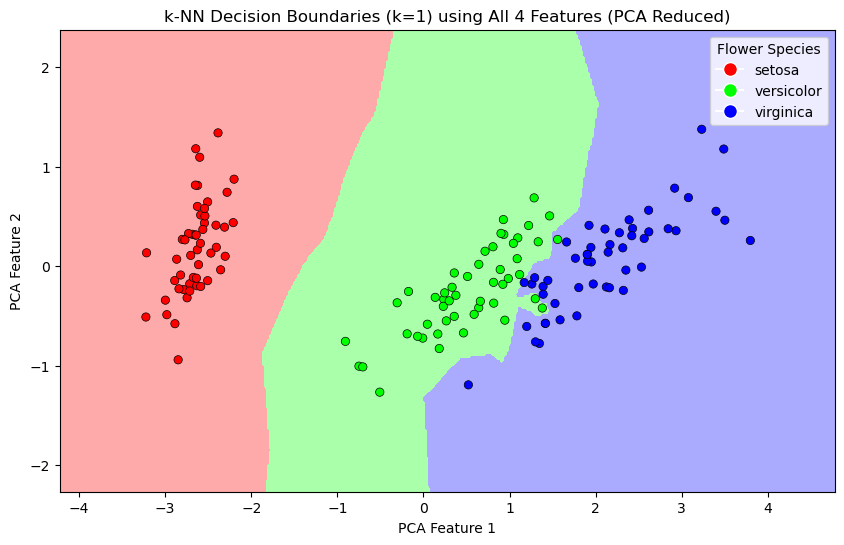

In [21]:
# Extract species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    
    #create a legend for the flower species
    unique_labels = label_encoder.inverse_transform(np.unique(y))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=cmap_bold.colors[i], markersize=10)
               for i, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title='Flower Species')

    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(title)
    plt.show()

# Perform PCA to reduce features to 2 dimensions
pca_all = PCA(n_components=2)
X_pca_all = pca_all.fit_transform(X)

# Split the dataset into 80% training and 20% testing data using all features (PCA-reduced)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_pca_all, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train KNN on the reduced PCA data
optimal_k_all = k_values[np.argmax(cv_scores_all)]  # Define the optimal k for demonstration
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k_all, weights='distance')
knn_pca.fit(X_train_all, y_train_all)

# Plot the decision boundaries using PCA-reduced data
plot_decision_boundaries(X_pca_all, y_encoded, knn_pca, f'k-NN Decision Boundaries (k={optimal_k_all}) using All 4 Features (PCA Reduced)')

In [22]:
#make predictions
y_pred = knn_pca.predict(X_test_all)

#create a confusion matrix
conf_matrix = confusion_matrix(y_test_all, y_pred)

#create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                               index=label_encoder.classes_, 
                               columns=label_encoder.classes_)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# alculate accuracy
accuracy = accuracy_score(y_test_all, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           0         10
Accuracy: 96.67%


# Bootstrapping stage

Now what we will do is we will boostrap to produce more data to validate the performance of our K-nearest Neighbour Algorithm.

In [23]:
def bootstrap_numpy(x, y, n_samples):
    #choosing a random indicies, indices can be repeated, which means that it is with replacement
    indices = np.random.choice(np.arange(len(x)), size=n_samples, replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]
    return x_bootstrap, y_bootstrap

In [24]:
features_boot = iris.data
#print(features)
target_boot = iris.target
#print(len(target))

In [25]:
# Generate multiple bootstrap samples
n_iterations = 20
#creating a bootstrap sample with the same size as the originial data set
bootstrap_samples = [bootstrap_numpy(features_boot, target_boot, len(features_boot)) for _ in range(n_iterations)]

In [26]:
import time
train_times = []
test_times = []
accuracy_average = []

In [27]:
for i in range (len(bootstrap_samples)):
    # Create Dataframe
    df = pd.DataFrame(data=bootstrap_samples[i][0], columns=iris.feature_names)
    
    df['target'] = bootstrap_samples[i][1]
    #Create and set the target as the species column
    df['species'] = df['target'].apply(lambda x: iris.target_names[x])
    
    #Extracting all of the column except the last 2 columns
    X = df.iloc[:, :-2].values

    #Extracting the species coloumn
    y = df['species'].values

    #This is a sklearn function which removes the mean and scale the data using varience for standardization 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    train_start_time = time.time()
    # Perform PCA to reduce features to 2 dimensions for visualisation
    pca_all = PCA(n_components=2)
    X_pca_all = pca_all.fit_transform(X)

    # Split the dataset into 80% training and 20% testing data using all features (PCA-reduced)
    X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
        X_pca_all, y_encoded, test_size=0.2, random_state=123, stratify=y_encoded
    )

    # Train KNN on the reduced PCA data
    #train with optimal size 1
    knn_pca = KNeighborsClassifier(n_neighbors=1, weights='distance')
    knn_pca.fit(X_train_all, y_train_all)
    
    train_end_time = time.time()
    train_total_time = train_end_time - train_start_time
    
    test_start_time = time.time()
    #make predictions
    y_pred = knn_pca.predict(X_test_all)

    #create a confusion matrix
    conf_matrix = confusion_matrix(y_test_all, y_pred)
    test_end_time = time.time()
    test_total_time = test_end_time - test_start_time

    #create a DataFrame for better visualization
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                   index=label_encoder.classes_, 
                                   columns=label_encoder.classes_)

    #print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # alculate accuracy
    accuracy = accuracy_score(y_test_all, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    train_times.append(train_total_time)
    test_times.append(test_total_time)
    accuracy_average.append(accuracy)
    
average_train = sum(train_times) / len(train_times)
average_test = sum(test_times) / len(test_times)
average_acuracy = sum(accuracy_average) / len(accuracy_average)
print(f"The Average training time is {average_train:.5f} | The Average testing time is {average_test:.5f} | The Average accuracy is {average_acuracy * 100:.2f}%")    

Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          11          0
virginica        0           0          9
Accuracy: 100.00%
Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           0         10
Accuracy: 96.67%
Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          12          0
virginica        0           1          7
Accuracy: 96.67%
Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          10          0
virginica        0           0         10
Accuracy: 100.00%
Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          10          0
virginica        0           0         10


If we look at the accuracy, it is almost constantly **above 90%** and it has the same prediction pattern where Iris Virginica is commonly predicted as Iris Versicolor. Besides that, we also realised that by using **Petal Length and Petal Width** only as a predictor would result in similar accuracy with the model which we used all of the features.